In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv("d://python/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

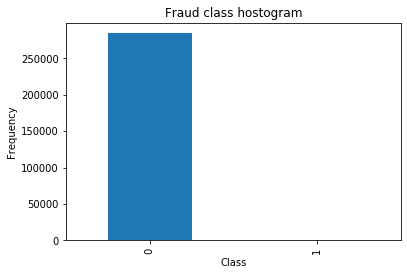

In [3]:
count_classes=pd.value_counts(data['Class'],sort= True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class hostogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X=data.ix[:,data.columns!='Class']
y=data.ix[:,data.columns=='Class']

number_record_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index

random_normal_indices=np.random.choice(normal_indices,number_record_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)

under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

under_sample_data=data.iloc[under_sample_indices,:]

X_undersample=under_sample_data.ix[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.ix[:,under_sample_data.columns=='Class']

print("Percentage of normal transactions",len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print("Percentage of normal transactions",len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print("Total number of transactions in resampled data",len(under_sample_data))

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Percentage of normal transactions 0.5
Percentage of normal transactions 0.5
Total number of transactions in resampled data 984


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [9]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print("Number transaction train dataset:",len(X_train))
print("Number transaction test dataset:",len(X_test))
print("Total number of transactions:",len(X_train)+len(X_test))

X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)

print("Number transaction train dataset:",len(X_train_undersample))
print("Number transaction test dataset:",len(X_test_undersample))
print("Total number of transactions:",len(X_train_undersample)+len(X_test_undersample))

Number transaction train dataset: 199364
Number transaction test dataset: 85443
Total number of transactions: 284807
Number transaction train dataset: 688
Number transaction test dataset: 296
Total number of transactions: 984


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)
    c_param_range=[0.01,0.1,1,10,100]
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall score'])
    results_table['C_parameter']=c_param_range
    
    j=0
    for c_param in c_param_range:
        print('=====================')
        print('C parameter:',c_param)
        print('====================')
        recall_accs=[]
        for iteration,indices in enumerate(fold,start=1):
            lr=LogisticRegression(C=c_param,penalty='l1')
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values.y_pred_undersample)
            recall_accs.append(recall_acc)
            print("Iteration",iteration,":recall score=",recall_acc)
        results_table.ix[j,"Mean recall score"]=np.mean(recall_accs)
        j+=1
        print('')
        print("Mean recall score",np.mean(call_accs))

In [69]:
def printing_Kfold_scores(x_train_data,y_train_data): 
    fold=KFold(shuffle=False,random_state=5)
    print(fold)
    c_param_range=[0.01,0.1,1,10,100] 
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall score']) 
    results_table['C_parameter']=c_param_range
    j=0
    for c_param in c_param_range:
        print('=====================')
        print('C parameter:',c_param)
        print('====================')
        recall_accs=[]
        for train_index,test_index in fold.split(y_train_data):
          
            
            lr=LogisticRegression(C=c_param,penalty='l1')
            lr.fit(x_train_data.iloc[train_index,:],y_train_data.iloc[train_index,:].values.ravel())

            y_pred_undersample=lr.predict(x_train_data.iloc[test_index,:].values)

            recall_acc=recall_score(y_train_data.iloc[test_index,:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print("recall score=",recall_acc)
        results_table.ix[j,"Mean recall score"]=np.mean(recall_accs)
        j+=1
        print('')
        print("Mean recall score",np.mean(recall_accs))
        print('')
    print(results_table)
    p=results_table["Mean recall score"].max()
    i=results_table["Mean recall score"]==p
    print(p)
    print(i)
    best_c=results_table.loc[i]['C_parameter']

    print("*************************************")
    print("Best model to choose from cross validation is with C parameter=",best_c)
    print("*************************************")
    return best_c


In [70]:
best_c=printing_Kfold_scores(X_train_undersample,y_test_undersample)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.

KFold(n_splits=3, random_state=5, shuffle=False)
C parameter: 0.01
recall score= 0.0
recall score= 0.0
recall score= 0.0

Mean recall score 0.0

C parameter: 0.1
recall score= 0.2978723404255319
recall score= 0.6363636363636364
recall score= 0.5178571428571429

Mean recall score 0.4840310398821037

C parameter: 1
recall score= 0.2765957446808511
recall score= 0.7045454545454546
recall score= 0.42857142857142855

Mean recall score 0.4699042092659114

C parameter: 10
recall score= 0.2978723404255319
recall score= 0.6818181818181818
recall score= 0.4642857142857143

Mean recall score 0.481325412176476

C parameter: 100
recall score= 0.2978723404255319
recall score= 0.6590909090909091
recall score= 0.4642857142857143

Mean recall score 0.47374965460071844

   C_parameter Mean recall score
0         0.01                 0
1         0.10          0.484031
2         1.00          0.469904
3        10.00          0.481325
4       100.00           0.47375
0.4840310398821037
0    False
1     Tru

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [66]:
print(best_c)

1    0.1
Name: C_parameter, dtype: float64
